# *Manufacturing Root Cause (Group 3)*

Project members:
- Amine Amri
- Julia Graham
- Sebastian Anusch
- Simone Assirelli 

****************************************************************************************************************************************

Key tasks & decisions by Thursday March 21st:
- [X] Missing values (drop or impute?) 
- [X] Address outliers 
- [X] Data normalization (standard scaler)
- [X] Feature reduction/selection 
- [X] Merge defects columns 
- [X] Prepare PPT 

Key tasks & decisions by next Q&A:


In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# 1. Data Preparation

In [2]:
url_defects = 'https://dl.dropboxusercontent.com/scl/fi/j3xred1cqmicuxui4kj6m/RC_DEFECTS_clean.csv?rlkey=gumwpqnsfvdyjdx5doi4i7zxb&dl=1'
url_production = 'https://dl.dropboxusercontent.com/scl/fi/baekmodofe2sn64qhrcur/RC_PRODUCTION_clean.csv?rlkey=uw7r9vgblez57cbnwsf2c3vmd&dl=1'
df_def = pd.read_csv(url_defects)
df_prod = pd.read_csv(url_production)

### Exploring the data

In [3]:
print(df_def.shape)
df_def.head()

(617, 10)


,COIL,MT_FROM,MT_TO,DATE,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,389523,0.0,599.0,2019-03-01,0,0,1,0,0,0
1,389523,600.0,1457.0,2019-03-01,0,1,1,0,0,0
2,389528,0.0,1399.0,2019-03-01,0,0,1,0,0,0
3,389528,1400.0,1539.0,2019-03-01,0,0,1,0,1,0
4,389712,0.0,1374.0,2019-03-01,0,0,1,0,0,0


In [4]:
print(df_prod.shape)
df_prod.head()

(299384, 110)


,COIL,DATE,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
0,240627,2019-03-15,0.0,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240627,2019-03-15,7.0,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,240627,2019-03-15,14.0,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,240627,2019-03-15,21.0,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,240627,2019-03-15,28.0,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,...,530.110125,14.625,14.625,1956.40875,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Columns of production dataframe
prod_columns = list(df_prod.columns)
print(prod_columns) 

['COIL', 'DATE', 'MT', 'TIME_START_PROCESS', 'SPEED_PROCESS', 'TEMP_Z1', 'TEMP_Z2', 'TEMP_Z3', 'TEMP_Z4', 'TEMP_Z5', 'TEMP_Z6', 'PYRO_1_PRECHMBR', 'PYRO_2_FRST_3_ZONE', 'PYRO_3_LST_3_ZONE', 'LS_OVEN', 'LASER_FRN_1', 'LASER_FRN_2', 'LASER_FRN_3', 'LASER_FRN_4', 'LASER_FRN_5', 'LASER_FRN_6', 'LASER_FRN_7', 'LASER_FRN_8', 'LASER_FRN_9', 'AIR_CH4_1', 'AIR_CH4_2', 'AIR_CH4_3', 'AIR_CH4_4', 'AIR_CH4_5', 'AIR_CH4_6', 'AIR_Z1_1', 'AIR_Z1_2', 'AIR_Z2_1', 'AIR_Z2_2', 'AIR_Z3_1', 'AIR_Z3_2', 'AIR_Z4_1', 'AIR_Z4_2', 'AIR_Z5_1', 'AIR_Z5_2', 'AIR_Z6_1', 'AIR_Z6_2', 'GAS_Z1_1', 'GAS_Z1_2', 'GAS_Z2_1', 'GAS_Z2_2', 'GAS_Z3_1', 'GAS_Z3_2', 'GAS_Z4_1', 'GAS_Z4_2', 'GAS_Z5_1', 'GAS_Z5_2', 'GAS_Z6_1', 'GAS_Z6_2', 'FRN_PHF_PRESSURE', 'FRN_FURNACE_PRESSURE', 'TIRO_FORNO', 'PRES_ZONA1_MEASURED', 'PRES_ZONA1_SET', 'PRES_ZONA2_MEASURED', 'PRES_ZONA2_SET', 'PRES_ZONA3_MEASURED', 'PRES_ZONA3_SET', 'EXT_1', 'EXT_2', 'VENT_1', 'VENT_2', 'VENT_3', 'VENT_4', 'VENT_5', 'COOL_1A', 'COOL_1B', 'COOL_2A', 'COOL_2B', 'COOL

In [6]:
df_prod.describe()

,COIL,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,...,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
count,2.993840e+05,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,...,283737.000000,283737.000000,283737.000000,283737.000000,270904.000000,270904.000000,270904.000000,270904.000000,270904.000000,270904.000000
mean,4.210808e+05,1013.750454,36.030174,1236.378668,1257.600788,1266.031784,1279.476562,1293.618170,1281.422092,802.675699,...,526.644078,18.292673,18.344328,3186.598116,39.900765,689.840763,3610.710095,0.532809,0.164599,0.169975
std,2.484114e+05,874.832131,11.243607,87.092407,87.833443,87.717798,85.313536,88.576110,84.233837,38.910802,...,34.108621,2.699142,2.794101,1306.570596,17.267686,279.623230,982.734142,0.232301,0.040681,0.038671
min,2.406270e+05,0.000000,-2.304028,79.722742,74.225453,74.198610,77.426415,78.567278,79.205925,549.382500,...,-3.665034,0.000000,0.000000,856.680000,-1.809788,-496.040375,-48.285825,0.000000,-0.011853,-0.016642
25%,3.947170e+05,378.000000,28.063851,1236.605625,1259.813250,1271.021625,1260.090000,1261.445625,1271.056781,795.292844,...,529.919898,16.875000,16.875000,2333.722500,28.351013,496.627351,2946.052969,0.470936,0.134999,0.135002
50%,4.037420e+05,812.000000,33.685521,1261.473750,1272.760476,1278.000540,1286.188125,1317.151607,1293.406875,811.525114,...,530.125500,18.000000,18.000000,2901.962812,37.656312,662.102578,3790.602141,0.559548,0.135037,0.161994
75%,4.146100e+05,1400.000000,44.908965,1270.924798,1293.924375,1303.419825,1316.148750,1333.189687,1313.704765,823.938673,...,530.315100,20.248013,20.250000,4021.551000,49.828513,837.825196,4217.453156,0.572413,0.188993,0.189022
max,6.838679e+06,7273.000000,67.408785,1322.268750,1344.982500,1357.508250,1348.341750,1367.288438,1362.536250,931.753875,...,541.123650,31.405500,32.747692,9073.901250,90.010696,2933.876250,6257.584687,7.342893,0.679614,0.324028


In [7]:
# How many unique coils are there in the defects dataframe?
unique_values_count_0 = df_def['COIL'].nunique()
print(f"In 'df_def' dataframe there are {unique_values_count_0} unique COIL values.")

In 'df_def' dataframe there are 534 unique COIL values.


In [8]:
subset_columns = ['COIL', 'MT_FROM', 'MT_TO', 'DATE']

#Check for duplicates in the first DataFrame
duplicates_df_def = df_def[df_def.duplicated(subset=subset_columns, keep=False)]


# Display the duplicates, if any, in each DataFrame
if not duplicates_df_def.empty:
    print("Duplicates found in df_def:")
    print(duplicates_df_def)
else:
    print("No duplicates found in 'df_def'")

No duplicates found in 'df_def'


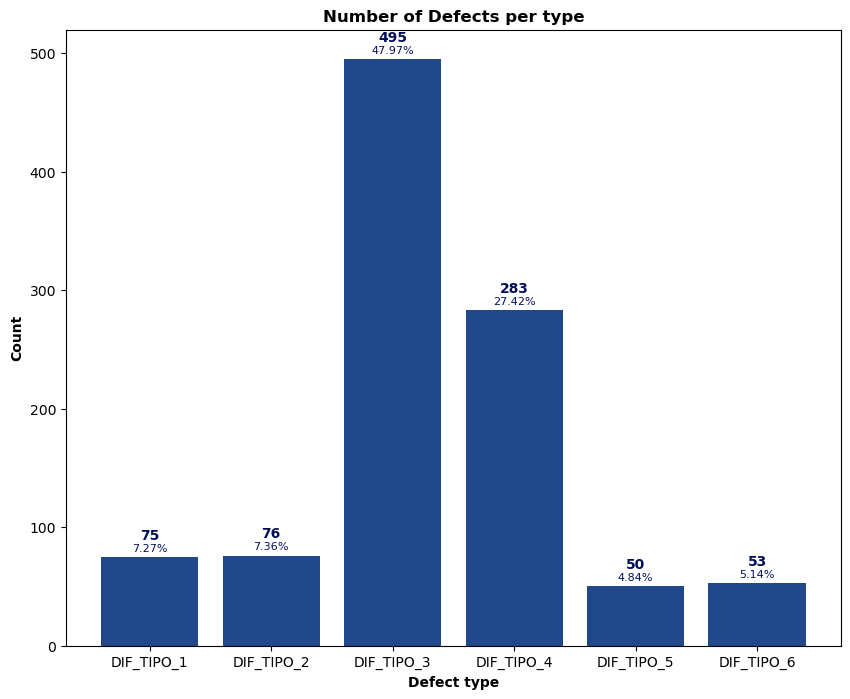

In [9]:
counts = df_def.iloc[:, 4:10].eq(1).sum()

# Calculate total count
total_count = counts.sum()

# Calculate percentage for each count
percentages = (counts / total_count) * 100

# Create a figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the counts using a bar chart with the specified color and font
bars = ax.bar(counts.index, counts.values, color='#21488A')
plt.bar(counts.index, counts.values, color='#21488A')
plt.title('Number of Defects per type', fontweight='bold')
plt.xlabel('Defect type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

for bar, count, percent in zip(bars, counts, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, count + 15, str(count), ha='center', fontweight='bold', color='#010F59')
    ax.text(bar.get_x() + bar.get_width() / 2, count + 5, f'{percent:.2f}%', ha='center', color='#010F59', fontsize='8')


plt.show()

### Adjustment of the 'MT' column
Since there are inconsistencies along the 'MT' column, i.e. there are coils with an inconsistent sequence of meters, we addressed this problem by creating a new variable 'MT_ADJUSTED' that ensures a correct sequence of meters (one observation every 7 meters)

In [10]:
df_prod.sort_values(['COIL', 'DATE', 'TIME_START_PROCESS'], inplace=True)
df_prod['MT_ADJUSTED'] = df_prod.groupby(['COIL'])['MT'] \
                          .transform(lambda x: np.arange(0., len(x) * 7, 7.))
df_prod.drop('MT', axis=1, inplace=True)

### Merging procedure

Attaching production information only over coils with defects

In [11]:
merged_defects = df_prod.merge(df_def, on=['COIL', 'DATE'], how='inner') # By doing so you obtain only the 
                                                                         # observations with defects
print(merged_defects.shape)

merged_defects = merged_defects[(merged_defects['MT_ADJUSTED'] >= merged_defects['MT_FROM']) & 
                      (merged_defects['MT_ADJUSTED'] < merged_defects['MT_TO'])] # This filtering is needed as you 
                                                                                 # want to specify that 
                                                                                 # 'MT_ADJUSTED' must be be found 
                                                                                 # inside the defect range 
merged_defects.drop_duplicates(['COIL', 'DATE', 'MT_ADJUSTED'], inplace=True)
merged_defects.drop(['MT_FROM', 'MT_TO'], axis=1, inplace=True)
print(merged_defects.shape)

(131179, 118)
(106075, 116)


In [12]:
lst_col_labels = ['COIL', 'DATE', 'MT_ADJUSTED']+[i for i in merged_defects.columns if 'DIF_TIPO' in i]
merged_defects = merged_defects[lst_col_labels]
merged_final = df_prod.merge(merged_defects, on = ['COIL', 'DATE', 'MT_ADJUSTED'], how='left')
merged_final.head()

,COIL,DATE,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,...,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,MT_ADJUSTED,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,240627,2019-03-15,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,734.603062,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,240627,2019-03-15,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,727.025625,...,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,240627,2019-03-15,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,724.035750,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
3,240627,2019-03-15,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,723.072375,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
4,240627,2019-03-15,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,724.168688,...,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN


After this process, 'merged_final' contains the production data with defect information correctly applied. Each row in 'merged_final' represents production data, and if there were any defects associated with the particular meter range of a coil, this information is now included in the corresponding rows.

Downloading the merged data in a csv format (in case you want to visualize it on Excel) \
P.S. Do not run this if you don't want to download it!

In [13]:
# ! pip install openpyxl
# merged_df.to_excel('merged_data.xlsx', index=False, engine='openpyxl')

### Dealing with Missing Values

Question: Are there missing values in the ['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6'] columns?

In [14]:
merged_final[['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 
           'DIF_TIPO_5', 'DIF_TIPO_6']].isna().sum()

DIF_TIPO_1    193309
DIF_TIPO_2    193309
DIF_TIPO_3    193309
DIF_TIPO_4    193309
DIF_TIPO_5    193309
DIF_TIPO_6    193309
dtype: int64

Answer: Yes. Therefore, we need to convern Null values to 0s for observations that have no defects

In [15]:
# List of defect columns - replace or extend this with your actual defect column names
defect_columns = ['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']

# Replace NaN values with 0 in defect columns
for col in defect_columns:
    merged_final[col] = merged_final[col].fillna(0)

merged_final[['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 
           'DIF_TIPO_5', 'DIF_TIPO_6']].isna().sum()

DIF_TIPO_1    0
DIF_TIPO_2    0
DIF_TIPO_3    0
DIF_TIPO_4    0
DIF_TIPO_5    0
DIF_TIPO_6    0
dtype: int64

In [16]:
# Checking overall missing values
merged_final.isna().sum().sum()

908899

Let's visualize missing values with a bar chart

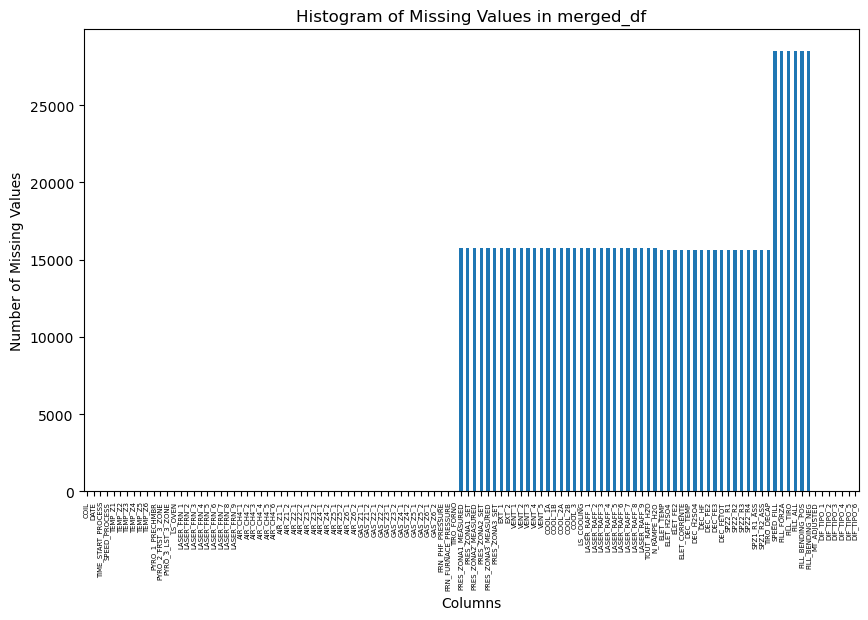

In [17]:
missing_values = merged_final.isna().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Histogram of Missing Values in merged_df')
plt.xticks(rotation=90, fontsize = 5)
plt.show()

In order to deal with the missing values, we decided to procceed with imputing the mean of each column, since the loss of information deriving from the elimination of columns would be too significant

In [18]:
for column in merged_final.columns:
    # Check if the column is numeric (float or int)
    if pd.api.types.is_numeric_dtype(merged_final[column]):
        # Calculate the mean of the current column, skipping NaN values
        mean_value = merged_final[column].mean()
        
        # Replace NaNs in the column with the mean value
        merged_final[column].fillna(mean_value, inplace=True)

In [19]:
# Checking overall missing values
print(f'After imputation we end up with {merged_final.isna().sum().sum()} missing values in the dataset')

After imputation we end up with 0 missing values in the dataset


###  Dealing with Outliers

Let's first identify the outliers by considering those values that fall outside of the 1st and 99th percentile range

In [20]:
def get_outlier_indices(merged_final, column):
    q1 = merged_final[column].quantile(0.01)
    q3 = merged_final[column].quantile(0.99)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = merged_final[(merged_final[column] < lower_bound) | (merged_final[column] > upper_bound)]
    return outliers.index

# Get a list of all outlier indices
outlier_indices = []
for column in merged_final.columns:
    if pd.api.types.is_numeric_dtype(merged_final[column]):
        outlier_indices.extend(get_outlier_indices(merged_final, column))

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

# Drop the outliers from the DataFrame
df_cleaned = merged_final.drop(outlier_indices)


# 2. Data Preprocessing

### Normalization

In [21]:
# Create a StandardScaler object
scaler = StandardScaler()

# List of defect columns to exclude
defect_columns = ['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']

# Select all numeric columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns

# Filter out the defect columns
numeric_cols = [col for col in numeric_cols if col not in defect_columns if col not in ['COIL', 'MT_ADJUSTED']]

df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

'merged_final' now contains normalized data

### Feature Selection

The number of features is definetely too high. We should approach this problem by eliminating  redundant or irrelevant information, and focusing on the most important features that contribute to our target variable. 
We followed a simple strategy, i.e. we set a threshold for correlation (0.65) and deleted the features whose correlation exceeded this threshold.

In [22]:
# Select only numeric data
numeric_data = df_cleaned.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

# Drop highly correlated features
df_reduced = df_cleaned.drop(to_drop, axis=1)

In [23]:
df_reduced.shape

(284700, 41)

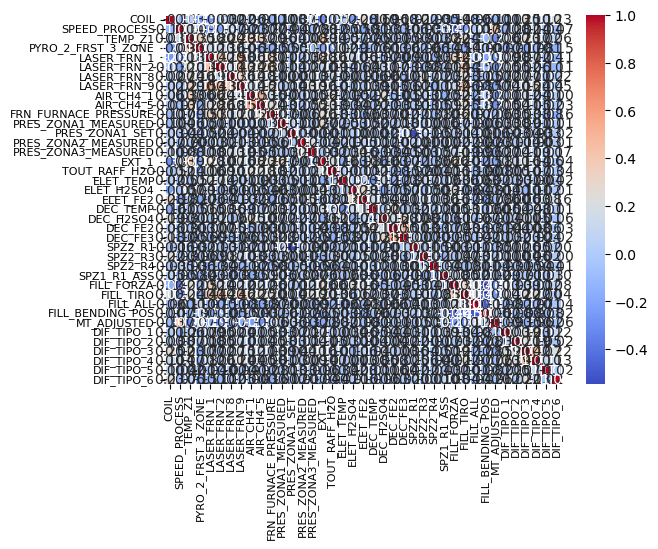

In [24]:
# Select only numeric data
numeric_data = df_reduced.select_dtypes(include=[np.number])
corr = numeric_data.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm',  # Choose a colormap that fits your needs
            annot=True,      # Add annotation to each cell
            linewidths=.5,   # Add lines between cells
            fmt=".2f")       # Format for the annotation

plt.tick_params(axis='x', which='major', labelsize=8)
plt.tick_params(axis='y', which='major', labelsize=8)
# Show the plot
plt.show()

In [25]:
prod_columns = list(df_reduced.columns)
print(prod_columns) 

['COIL', 'DATE', 'TIME_START_PROCESS', 'SPEED_PROCESS', 'TEMP_Z1', 'PYRO_2_FRST_3_ZONE', 'LASER_FRN_1', 'LASER_FRN_2', 'LASER_FRN_8', 'LASER_FRN_9', 'AIR_CH4_1', 'AIR_CH4_5', 'FRN_FURNACE_PRESSURE', 'PRES_ZONA1_MEASURED', 'PRES_ZONA1_SET', 'PRES_ZONA2_MEASURED', 'PRES_ZONA3_MEASURED', 'EXT_1', 'TOUT_RAFF_H2O', 'ELET_TEMP', 'ELET_H2SO4', 'ELET_FE2', 'DEC_TEMP', 'DEC_H2SO4', 'DEC_FE2', 'DEC_FE3', 'SPZ2_R1', 'SPZ2_R3', 'SPZ2_R4', 'SPZ1_R1_ASS', 'FILL_FORZA', 'FILL_TIRO', 'FILL_ALL', 'FILL_BENDING_POS', 'MT_ADJUSTED', 'DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']


### Merging the defect columns 

In [26]:
# Create a new column 'Has_Defect' which is 1 if any of 'DIF_TIPO_X' columns are 1, otherwise 0
df_reduced['Has_Defect'] = df_reduced[defect_columns].max(axis=1)
cols_to_drop = ['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']
df_new = df_reduced.drop(cols_to_drop,  axis=1)

# Now df['Has_Defect'] is 1 for rows where there's at least one defect, and 0 where there are none

How many records have at least 1 defect?

In [27]:
print(f"The number of records that have at least 1 defect is {df_reduced['Has_Defect'].value_counts()[1]}")

The number of records that have at least 1 defect is 101032


Visualize Defects per day

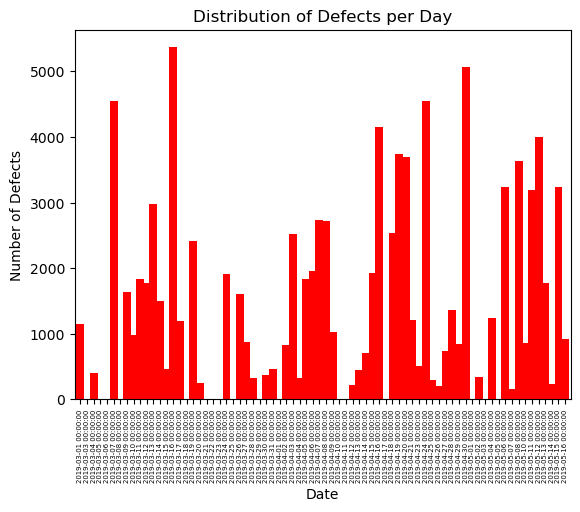

In [28]:

# Ensure the date column is in datetime format
df_reduced['DATE'] = pd.to_datetime(df_reduced['DATE'])

# If you have a binary 'defect' column, use sum. If not, adjust this step accordingly.
defects_per_day = df_reduced.groupby('DATE')['Has_Defect'].sum()

# Plot the distribution
defects_per_day.plot(kind='bar', width=1.2, color='red') # or 'line', depending on your preference
plt.title('Distribution of Defects per Day')
plt.xlabel('Date')
plt.ylabel('Number of Defects')
plt.xticks(rotation=90, fontsize = 5)
plt.show()

# 3. Machine Learning Algorithm 

In [29]:

columns = df_new.columns.tolist()
columns.remove('MT_ADJUSTED')
columns.insert(1, 'MT_ADJUSTED')
df_ordered = df_new[columns]


In [30]:
df_ordered.head()

,COIL,MT_ADJUSTED,DATE,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,PYRO_2_FRST_3_ZONE,LASER_FRN_1,LASER_FRN_2,LASER_FRN_8,...,DEC_FE3,SPZ2_R1,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,Has_Defect
580,297712,0.0,2019-03-03,16:00:17.140,-1.749652,-0.626250,0.589075,1.130454,0.502602,-3.281993,...,0.006705,-4.055691,-0.025649,-0.212018,-0.005561,-0.006274,-0.003943,-0.018846,0.032585,0.0
581,297712,7.0,2019-03-03,16:01:02.140,-1.423870,-0.548642,0.310833,1.167358,0.536880,-3.286931,...,0.006705,-4.055691,-0.025649,-0.212018,-0.005561,-0.006274,-0.003943,-0.018846,0.032585,0.0
582,297712,14.0,2019-03-03,16:01:32.140,-1.249998,-0.489710,0.219359,1.169191,0.517051,-3.283506,...,0.006705,-4.055691,-0.025649,-0.212018,-0.005561,-0.006274,-0.003943,-0.018846,0.032585,0.0
583,297712,21.0,2019-03-03,16:01:47.080,-1.250524,-0.472777,0.560960,1.183099,0.518985,-3.239610,...,0.006705,-4.055691,-0.025649,-0.212018,-0.005561,-1.168397,-2.503042,-2.304904,2.544077,0.0
584,297712,28.0,2019-03-03,16:02:17.080,-1.250053,-0.457463,0.437551,1.189643,0.511223,-3.249343,...,1.560311,0.016170,-6.136144,0.139092,-0.574788,-1.176393,-2.717672,-2.300860,2.543651,0.0


### Decision Tree Classifier

In [31]:
target = "Has_Defect"
X = df_ordered.drop(['COIL', 'MT_ADJUSTED', 'DATE', 'TIME_START_PROCESS', target], axis=1)
y = df_ordered[target]

In [32]:
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a test set
train_size = 0.6
random_state = 42
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = train_size, random_state = random_state)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(170820, 31) (113880, 31) (170820,) (113880,)


In [38]:
# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(Xtrain, ytrain)

# Obtain feature importances from the trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Rank features by importance
feature_importance_ranking = np.argsort(feature_importances)[::-1]

# Print the ranked features along with their names
print("Feature Ranking:")
for rank, feature_idx in enumerate(feature_importance_ranking):
    print(f"Rank {rank + 1}: Feature '{df_ordered.columns[feature_idx]}' - Importance Score: {feature_importances[feature_idx]}")


Feature Ranking:
Rank 1: Feature 'MT_ADJUSTED' - Importance Score: 0.10027424970866941
Rank 2: Feature 'DATE' - Importance Score: 0.08790606915356255
Rank 3: Feature 'COIL' - Importance Score: 0.06219821586604177
Rank 4: Feature 'SPZ2_R3' - Importance Score: 0.057768881393062105
Rank 5: Feature 'TIME_START_PROCESS' - Importance Score: 0.04989698247063365
Rank 6: Feature 'EXT_1' - Importance Score: 0.04849308513586328
Rank 7: Feature 'ELET_TEMP' - Importance Score: 0.0473058824861066
Rank 8: Feature 'PRES_ZONA3_MEASURED' - Importance Score: 0.04449678323616329
Rank 9: Feature 'PRES_ZONA1_MEASURED' - Importance Score: 0.04448279183306509
Rank 10: Feature 'SPEED_PROCESS' - Importance Score: 0.04039515777645545
Rank 11: Feature 'SPZ2_R4' - Importance Score: 0.040251739072221834
Rank 12: Feature 'PYRO_2_FRST_3_ZONE' - Importance Score: 0.03962791558028588
Rank 13: Feature 'ELET_H2SO4' - Importance Score: 0.03651726084585553
Rank 14: Feature 'ELET_FE2' - Importance Score: 0.03536624546694873

In [39]:
 #Specify the number of top features to keep
num_top_features = 20  # Adjust this number as needed

# Select the top-ranked features
selected_feature_indices = feature_importance_ranking[:num_top_features]
selected_feature_names = [df_ordered.columns[idx] for idx in selected_feature_indices]

# Print the selected top features
print("Selected Top Features:")
for feature_name in selected_feature_names:
    print(feature_name)

Selected Top Features:
MT_ADJUSTED
DATE
COIL
SPZ2_R3
TIME_START_PROCESS
EXT_1
ELET_TEMP
PRES_ZONA3_MEASURED
PRES_ZONA1_MEASURED
SPEED_PROCESS
SPZ2_R4
PYRO_2_FRST_3_ZONE
ELET_H2SO4
ELET_FE2
TEMP_Z1
DEC_FE3
LASER_FRN_8
LASER_FRN_1
SPZ2_R1
FRN_FURNACE_PRESSURE


In [33]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(criterion = 'entropy') # 1. choose model class

# Perform Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)

print("CV Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

model.fit(Xtrain, ytrain)                             # 2. instantiate model
ytrain_dt = model.predict(Xtrain)                      # 3. fit model to data 

CV Scores: [0.65830699 0.58326308 0.58205128 0.50950123 0.64450299]
Average CV Score: 0.5955251141552511


In [34]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(ytrain, ytrain_dt)
print("The accuracy on training set is {0:.2f}%".format(accuracy_train * 100))

The accuracy on training set is 100.00%


In [35]:
ytest_dt = model.predict(Xtest)                  # 4. predict on new data
accuracy_test = accuracy_score(ytest, ytest_dt)
print("The accuracy on test set is {0:.2f}%".format(accuracy_test * 100))

The accuracy on test set is 98.42%


In [36]:
# from matplotlib import pyplot
# from sklearn.tree import plot_tree
# from matplotlib.pyplot import figure
# figure(figsize = (15,15))
# plot_tree(model
# #          , fontsize=6
#           , filled=True
#           , rounded = True
#           , proportion = True
#          );

### Set of classifiers

In [37]:
model_lbls = ['dt' # decision tree
             ,'nb' # gaussian naive bayes
             ,'lp'   # linear perceptron
      #        ,'svc'  # support vector # deactivate if running time becomes too long
             ,'knn'  # k nearest neighbours
             ,'adb'  # adaboost
             ,'rf'   # random forest
            ]

# For each model we have to prepare the ranges of the hyperparameters that will be used
# and also a name of the model that will be put in output 
models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(random_state=random_state), # We difine inside the estimator
           # the hyperparapeter that will not be subject to the parameter grid (GridSearchCV)
           'param': [{'max_depth': [*range(1,20)],'class_weight':[None,'balanced']}],  
                   # For max_depth we create                 #here we say if we want the dataset 
                   # a list of numbers bw 1 and 19           # as it is or balanced                                                             
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': [{'var_smoothing': [10**exp for exp in range(-3,-13,-1)]}]
           # the NB has only one parameter
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(random_state=random_state),
           'param': [{'early_stopping': [True,False],'class_weight':[None,'balanced']}],
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(random_state=random_state), 
           'param': [{'kernel': ['rbf'], # we have hyperparameters for each kernel
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100],                     
             },
                   ]
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': [{'n_neighbors': list(range(1,7))}]
       },
    'adb':{'name': 'AdaBoost           ',
           'estimator': AdaBoostClassifier(random_state=random_state),
           'param': [{'n_estimators':[10,20,30,40,50]
                     ,'learning_rate':[0.2,0.5,0.75,1,1.25,1.5]}]
          },
    'rf': {'name': 'Random forest       ',
           'estimator': RandomForestClassifier(random_state=random_state),
           'param': [{'max_depth': [*range(4,10)]
                     ,'n_estimators':[*range(10,60,10)]}]
          }

}